In [ ]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
url = "https://raw.githubusercontent.com/callxpert/datasets/master/Loan-applicant-details.csv"
names = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
dataset = pd.read_csv(url, names=names)
#dataset = pd.read_csv("trainloan.csv")

In [ ]:
print(dataset.head(20))

     Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0   LP001003    Male     Yes  ...              1         Rural           N
1   LP001005    Male     Yes  ...              1         Urban           Y
2   LP001006    Male     Yes  ...              1         Urban           Y
3   LP001008    Male      No  ...              1         Urban           Y
4   LP001011    Male     Yes  ...              1         Urban           Y
5   LP001013    Male     Yes  ...              1         Urban           Y
6   LP001014    Male     Yes  ...              0     Semiurban           N
7   LP001018    Male     Yes  ...              1         Urban           Y
8   LP001020    Male     Yes  ...              1     Semiurban           N
9   LP001024    Male     Yes  ...              1         Urban           Y
10  LP001028    Male     Yes  ...              1         Urban           Y
11  LP001029    Male      No  ...              1         Rural           N
12  LP001030    Male     

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])

In [ ]:
array = dataset.values
X = array[:,6:11]
Y = array[:,12]
X = X.astype('int') 
Y = Y.astype('int')
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

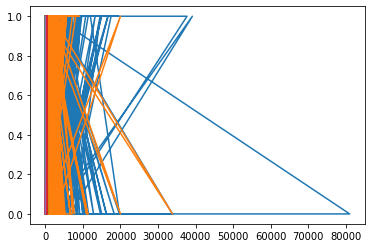

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_train, y_train)
plt.show()

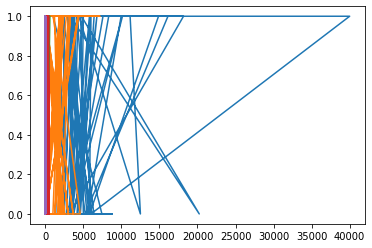

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_test, y_test)
plt.show()

In [ ]:
dataset.shape

(480, 13)

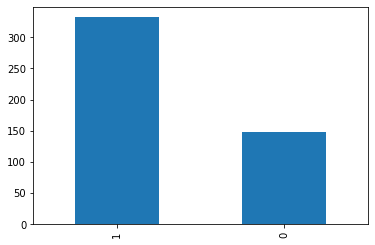

In [ ]:
dataset['Loan_Status'].value_counts(normalize=True)
dataset['Loan_Status'].value_counts().plot.bar()

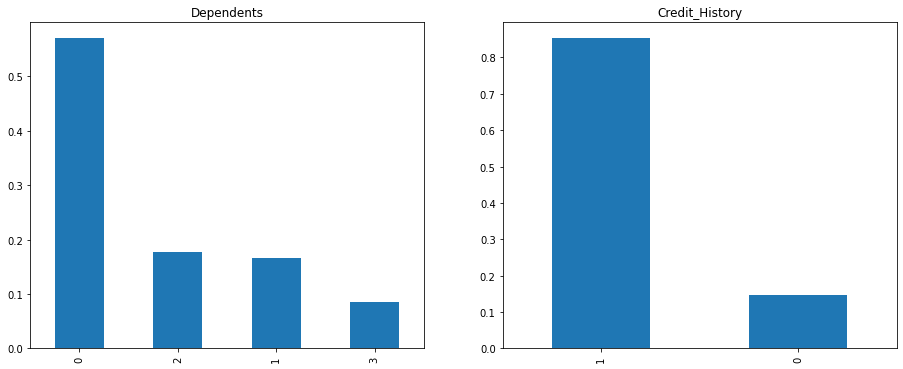

In [ ]:
plt.figure(1)
plt.subplot(131)
dataset['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
dataset['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

Loan_Status    0    1
Education            
0            112  271
1             36   61


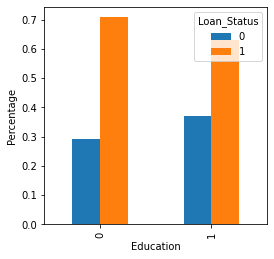

In [ ]:
print(pd.crosstab(dataset['Education'],dataset['Loan_Status']))

Education=pd.crosstab(dataset['Education'],dataset['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7708333333333334


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.75


In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.6354166666666666
